### Step 1: Data understanding

In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [376]:
# read the data
housing = pd.read_csv("train.csv")
# As a preparatory step, let's drop column.
housing = housing.drop("Id", axis =1 )
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**SalePrice is the target variable here**

In [377]:
housing.shape

(1460, 80)

In [378]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

- There are many variables having null values




In [379]:
housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- From above we van see many variables having most zero values

In [380]:
housing.head(80)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


- From above we can see there are many NA values 

### Step 2: Data cleaning and EDA

In [381]:
# Checking the percentage of missing values
null = round((housing.isnull().sum()/len(housing)*100),2).sort_values(ascending=False)
null.head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtCond         2.53
BsmtQual         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
MSSubClass       0.00
dtype: float64

In [382]:
# Removing rows whose null values are more than 17%.
# for LotFrontage we will impute it later
housing = housing.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], 1)

C:\Users\91908\AppData\Local\Temp/ipykernel_22020/3415809953.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  housing = housing.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], 1)


Impute categorical variable yes no to 0 and 1.
impute categorical quality/rating/grade related variable to numberical format

**Visualising continous variables**
 
 Lets check scatter plot on only 'area' variables
we can see strong linear relation in 'LotFrontage', 'LotArea' TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea, 

'LowQualFinSF','BsmtFinSF2','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' features have single values and can be dropped.

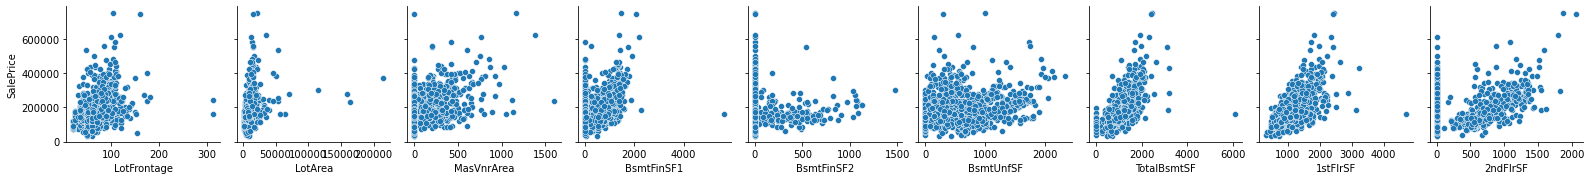

In [383]:
sns.pairplot(data=housing, x_vars=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF'], y_vars=['SalePrice'])
plt.show()

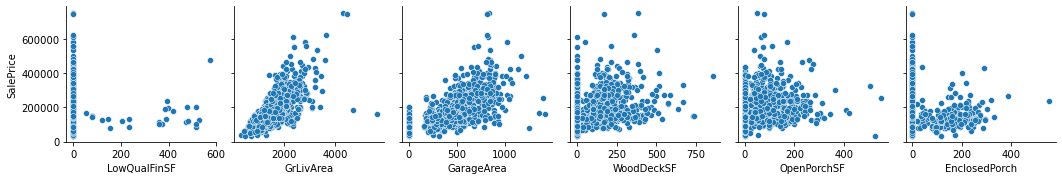

In [384]:
sns.pairplot(data=housing, x_vars=['LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch'], y_vars=['SalePrice'])
plt.show()

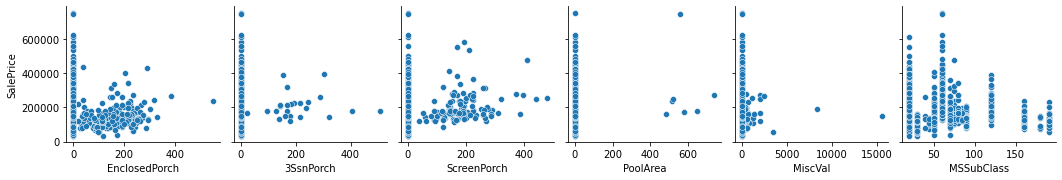

In [385]:
sns.pairplot(data=housing, x_vars=['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MSSubClass'], y_vars=['SalePrice'])
plt.show()

In [386]:
#dropping col which have high zero values
housing.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','BsmtFinSF2'], axis=1, inplace=True)

# Checking the remaining columns
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'YrSold', 'SaleTyp

In [387]:
housing.shape

(1460, 68)

In [388]:
print(housing['KitchenAbvGr'].value_counts())
print(housing['BsmtFullBath'].value_counts()) 
print(housing['BsmtHalfBath'].value_counts())
print(housing['FullBath'].value_counts())
print(housing['HalfBath'].value_counts())
print(housing['BedroomAbvGr'].value_counts())
print(housing['Street'].value_counts())
print(housing['Utilities'].value_counts())

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64
0    913
1    535
2     12
Name: HalfBath, dtype: int64
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


**Comment:**
It seems above all variables will be needed except Street and utilities

In [389]:
# We can also drop columns that show very low variance and thus not required for predictions
housing = housing.drop(['Street'], axis = 1)

In [390]:
housing = housing.drop(['Utilities'], axis = 1)

In [391]:
# MoSold will also not be usefull since we have year old columns
housing = housing.drop(['MoSold'], axis = 1)

In [392]:
#converting year format to no.of year till 2010 for Garage year built, YearBuilt, YearRemodAdd
housing.GarageYrBlt = housing.GarageYrBlt.apply(lambda x: 2010-x)
housing.YearBuilt = housing.YearBuilt.apply(lambda x: 2010-x)
housing.YearRemodAdd = housing.YearRemodAdd.apply(lambda x: 2010-x)

In [393]:
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice']

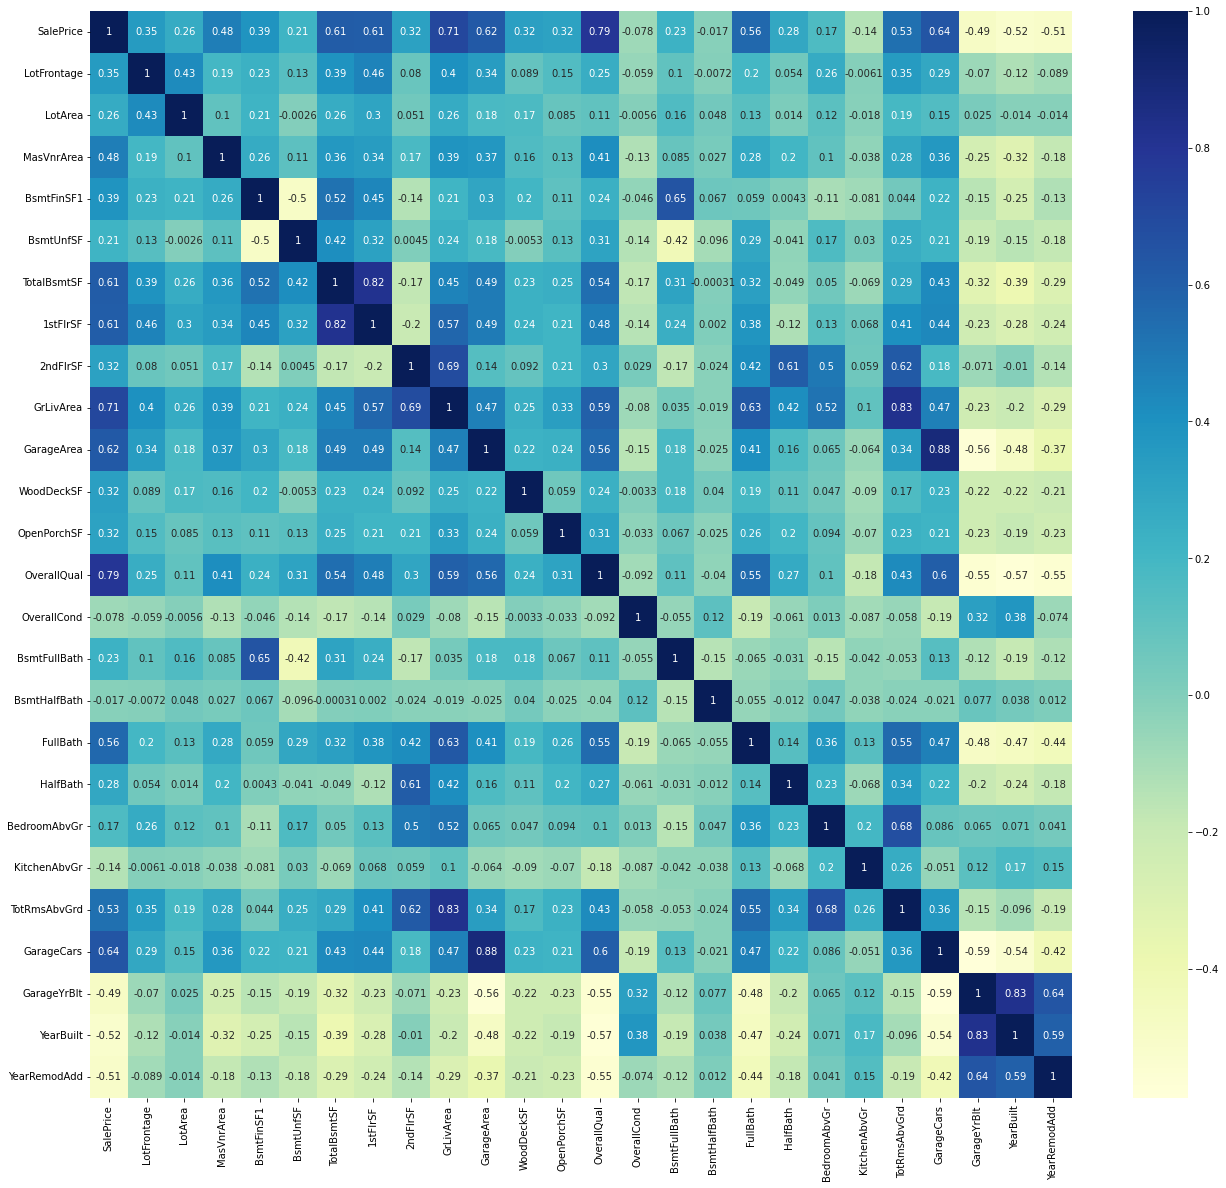

In [394]:
# Looking at correlations on sqr feet area variables
#'MiscVal','OverallQual','OverallCond',BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen because these has numerical values
# adding quality/grade related numerical variable in heatmap also
# adding no of year variables also
# Let's see the correlation matrix 
plt.figure(figsize = (22,20))
sns.heatmap(housing[['SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual','TotRmsAbvGrd','GarageCars','GarageQual','GarageCond','GarageYrBlt','YearBuilt','YearRemodAdd']].corr(),annot=True,cmap='YlGnBu')
plt.show()

sale price rates are high for below variables
- OverallQual
- GrLivArea
- ExterQual
- KitchenQual
- BsmtQual
- GarageArea
- TotalBsmtSF
- 1stFlrSF
- FullBath
- MasVnrArea

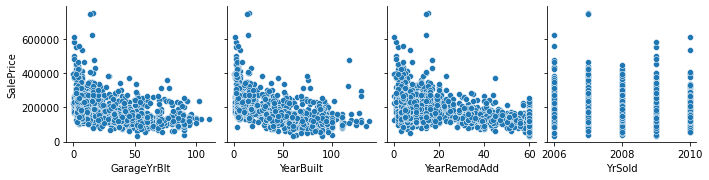

In [395]:
sns.pairplot(data=housing, x_vars=['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold'], y_vars=['SalePrice'])
plt.show()

**Comment:**
- Recently built garage have higher SalePrice 
- Recently build houses have higher SalePrice 
- Recently remodelled houses have higher SalePrice 
- YrSold still does not show any significant trend we can drop this col

**Comment:**

- GarageCars and GarageArea (Correlation = 0.88), dropping GarageCars
- GarageYrBlt and YearBuilt (Correlation = 0.83), dropping GarageYrBlt
- TotRmsAbvGrd and GrLivArea (Correlation = 0.83), dropping TotRmsAbvGrd
- TotalBsmtSF and 1stflrSF (Correlation = 0.82), dropping TotalBsmtSF

In [396]:
housing.drop(['YrSold','GarageYrBlt','GarageCars','TotRmsAbvGrd','TotalBsmtSF'], axis=1, inplace=True)

In [397]:
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [398]:
housing.shape

(1460, 60)

#### Visualising categorical variables

In [399]:
NA_categorical = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', ]
print(housing[NA_categorical].isnull().sum())

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64


In [400]:
# Imputing missing values with "Not_applicable"
housing[NA_categorical] = housing[NA_categorical].fillna(value='Not_applicable', axis=1)

# Checking after imputation
print(housing[NA_categorical].isnull().sum())

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64


In [401]:
# Changing yes/no to 0 and 1
var = ['CentralAir']
housing[var]= housing[var].apply(lambda x: x.map({'N':0,'Y':1}))
housing['CentralAir']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      0
30      0
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      0
40      1
41      1
42      1
43      1
44      1
45      1
46      1
47      1
48      1
49      1
50      1
51      1
52      0
53      1
54      1
55      1
56      1
57      1
58      1
59      1
60      1
61      0
62      1
63      1
64      1
65      1
66      1
67      1
68      1
69      1
70      1
71      1
72      1
73      1
74      0
75      1
76      1
77      1
78      0
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      0
89      1
90      1
91      1
92      1
93      0
94      1
95      1
96      1
97      1
98      0
99      1


In [402]:
# encoding ordered feature
varlist =  ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual','GarageQual','GarageCond']

# Defining the map function
def binary_map(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Not_applicable':0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [403]:
var1 = ['LotShape']
housing[var1]= housing[var1].apply(lambda x: x.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3}))
var3 = ['LandSlope']
housing[var3]= housing[var3].apply(lambda x: x.map({'Gtl':0,'Mod':1,'Sev':2}))
var4 = ['HouseStyle']
housing[var4]= housing[var4].apply(lambda x: x.map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7}))
var5 = ['BsmtExposure']
housing[var5]= housing[var5].apply(lambda x: x.map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4}))
var6 = ['BsmtFinType1']
housing[var6]= housing[var6].apply(lambda x: x.map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}))
var7 = ['BsmtFinType2']
housing[var7]= housing[var7].apply(lambda x: x.map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}))
var8 = ['Functional']
housing[var8]= housing[var8].apply(lambda x: x.map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7}))
var9 = ['GarageFinish']
housing[var9]= housing[var9].apply(lambda x: x.map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3}))


In [404]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   int64  
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   int64  
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   int64  
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [405]:
# Since MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea
housing = housing[~housing['MasVnrArea'].isnull()]

In [406]:
# Checking the percentage of missing values
null = round((housing.isnull().sum()/len(housing)*100),2).sort_values(ascending=False)
null.head(20)

LotFrontage     17.70
Electrical       0.07
MSSubClass       0.00
KitchenAbvGr     0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
1stFlrSF         0.00
2ndFlrSF         0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBath     0.00
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenQual      0.00
BsmtFinType2     0.00
Functional       0.00
Fireplaces       0.00
GarageType       0.00
dtype: float64

In [407]:
housing['Electrical'].isnull().sum()

1

In [408]:
# dropping rows with null values in 'Electrical', for very low missing value count
housing.dropna(subset=['Electrical'], inplace=True)

In [409]:
# Checking the percentage of missing values
null = round((housing.isnull().sum()/len(housing)*100),2).sort_values(ascending=False)
null.head(20)

LotFrontage     17.71
MSSubClass       0.00
KitchenAbvGr     0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.00
1stFlrSF         0.00
2ndFlrSF         0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBath     0.00
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenQual      0.00
BsmtFinType2     0.00
Functional       0.00
Fireplaces       0.00
GarageType       0.00
dtype: float64

In [410]:
# Lets impute LotFrontage
# Crosscheck the updated 'LotFrontage' column
housing['LotFrontage'].describe()

count    1194.000000
mean       70.027638
std        24.299302
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [411]:
housing["LotFrontage"].fillna(housing["LotFrontage"].median(), inplace=True)

In [412]:
housing['LotFrontage'].describe()

count    1451.000000
mean       69.845624
std        22.044429
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [413]:
# Checking the percentage of missing values
null = round((housing.isnull().sum()/len(housing)*100),2).sort_values(ascending=False)
null.head(20)

MSSubClass      0.0
MSZoning        0.0
BsmtUnfSF       0.0
Heating         0.0
HeatingQC       0.0
CentralAir      0.0
Electrical      0.0
1stFlrSF        0.0
2ndFlrSF        0.0
GrLivArea       0.0
BsmtFullBath    0.0
BsmtHalfBath    0.0
FullBath        0.0
HalfBath        0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
KitchenQual     0.0
Functional      0.0
Fireplaces      0.0
GarageType      0.0
dtype: float64

#### Visualising ordered categorical variables

In [414]:
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

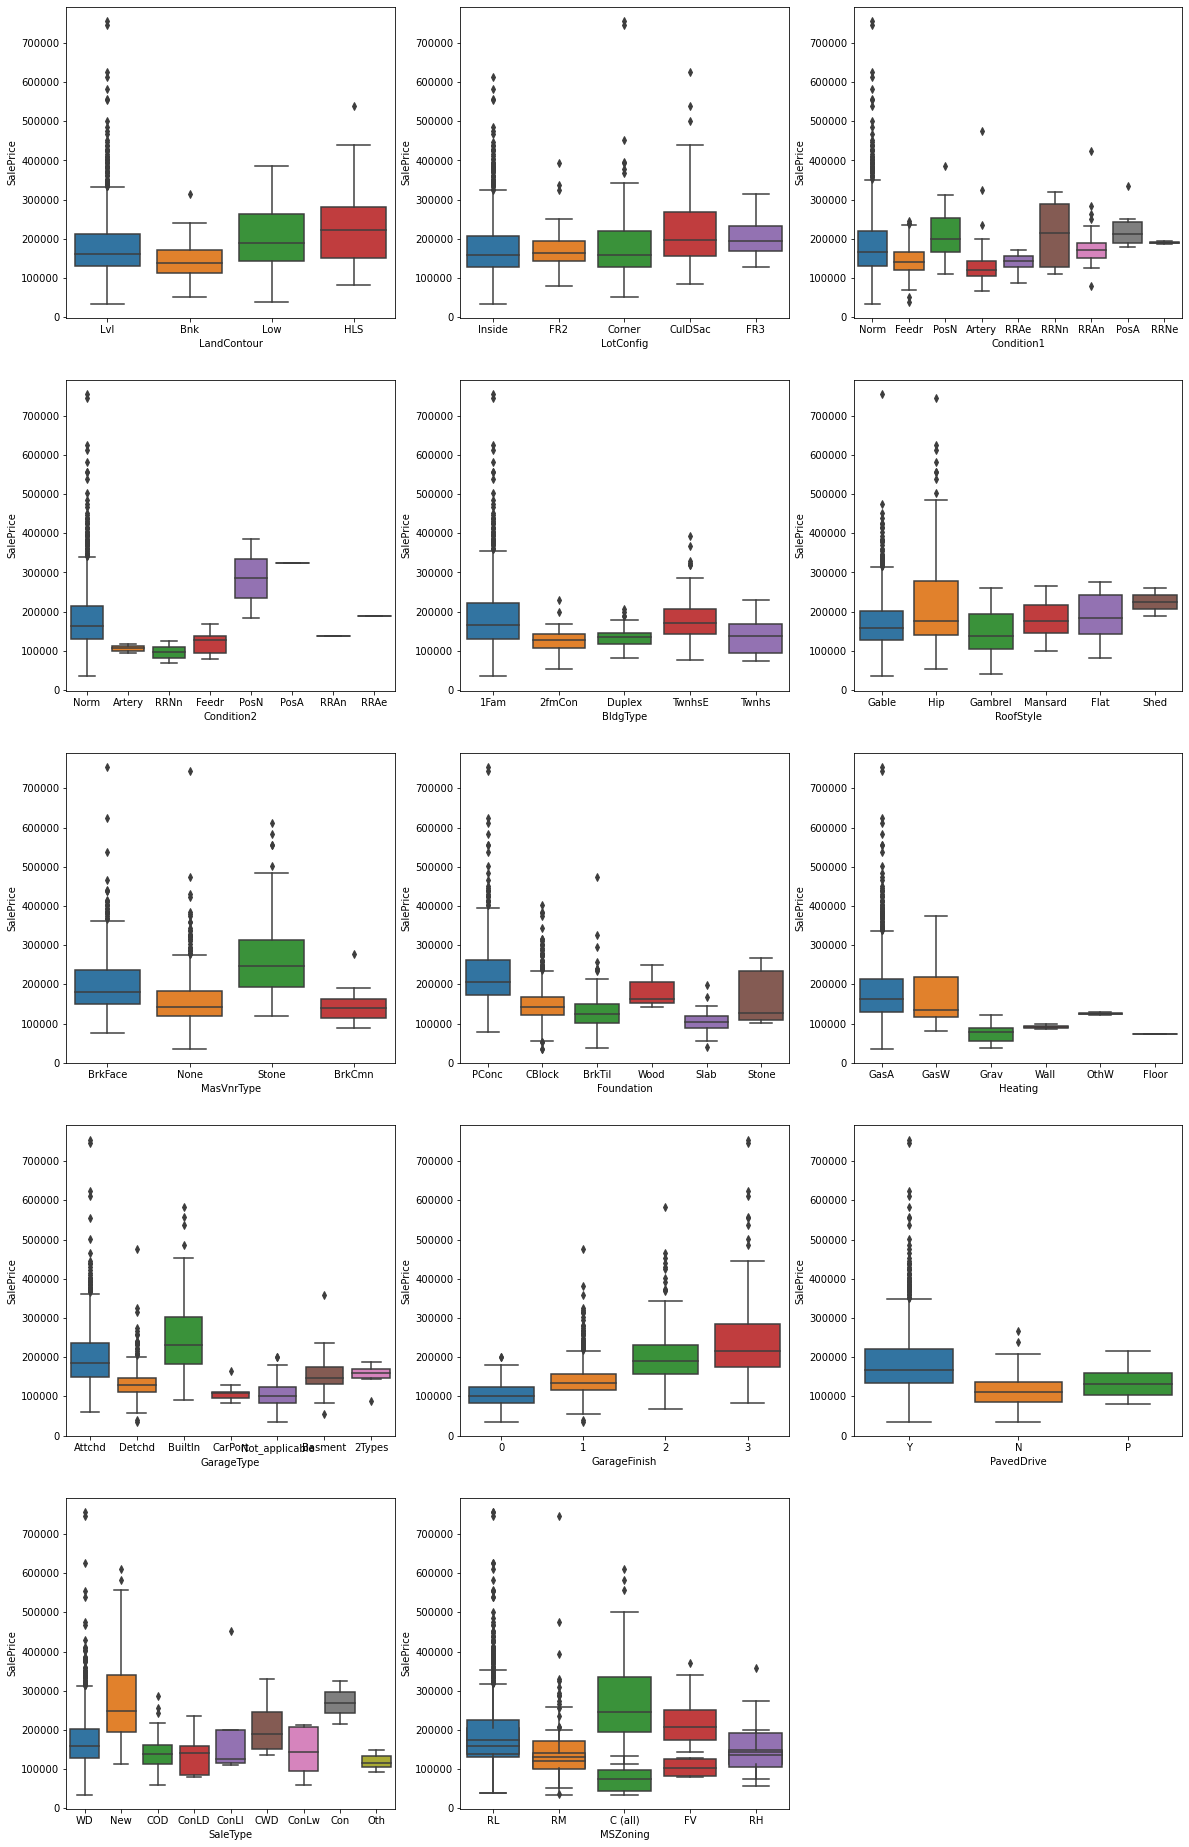

In [415]:

plt.figure(figsize=(20,40))
plt.subplot(6,3,1)
sns.boxplot(x='LandContour',y='SalePrice',data=housing)
plt.subplot(6,3,2)
sns.boxplot(x='LotConfig',y='SalePrice',data=housing)
plt.subplot(6,3,3)
sns.boxplot(x='Condition1',y='SalePrice',data=housing)
plt.subplot(6,3,4)
sns.boxplot(x='Condition2',y='SalePrice',data=housing)
plt.subplot(6,3,5)
sns.boxplot(x='BldgType',y='SalePrice',data=housing)
plt.subplot(6,3,6)
sns.boxplot(x='RoofStyle',y='SalePrice',data=housing)
plt.subplot(6,3,7)
sns.boxplot(x='MasVnrType',y='SalePrice',data=housing)
plt.subplot(6,3,8)
sns.boxplot(x='Foundation',y='SalePrice',data=housing)
plt.subplot(6,3,9)
sns.boxplot(x='Heating',y='SalePrice',data=housing)
plt.subplot(6,3,10)
sns.boxplot(x='GarageType',y='SalePrice',data=housing)
plt.subplot(6,3,11)
sns.boxplot(x='GarageFinish',y='SalePrice',data=housing)
plt.subplot(6,3,12)
sns.boxplot(x='PavedDrive',y='SalePrice',data=housing)
plt.subplot(6,3,13)
sns.boxplot(x='SaleType',y='SalePrice',data=housing)
plt.subplot(6,3,14)
sns.boxplot(x='SaleCondition',y='SalePrice',data=housing)
plt.subplot(6,3,14)
sns.boxplot(x='MSZoning',y='SalePrice',data=housing)
plt.show()

**Comments**
- For landcontour HLS has the high sale price
- For LotConfig CulDSac has higher sale price than others
- Condition1 RRNn has higher sale price than others
- Condition2 PosN has higher sale price than others
- BldgType 1Fam and TwnhsE has similar midian value
- RoofStyle Hip has higher sale price than others
- GarageType BuiltIn has much higher sales price
- PavedDrive having yes has hight sales price

#### Visualising unordered categorical variables

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

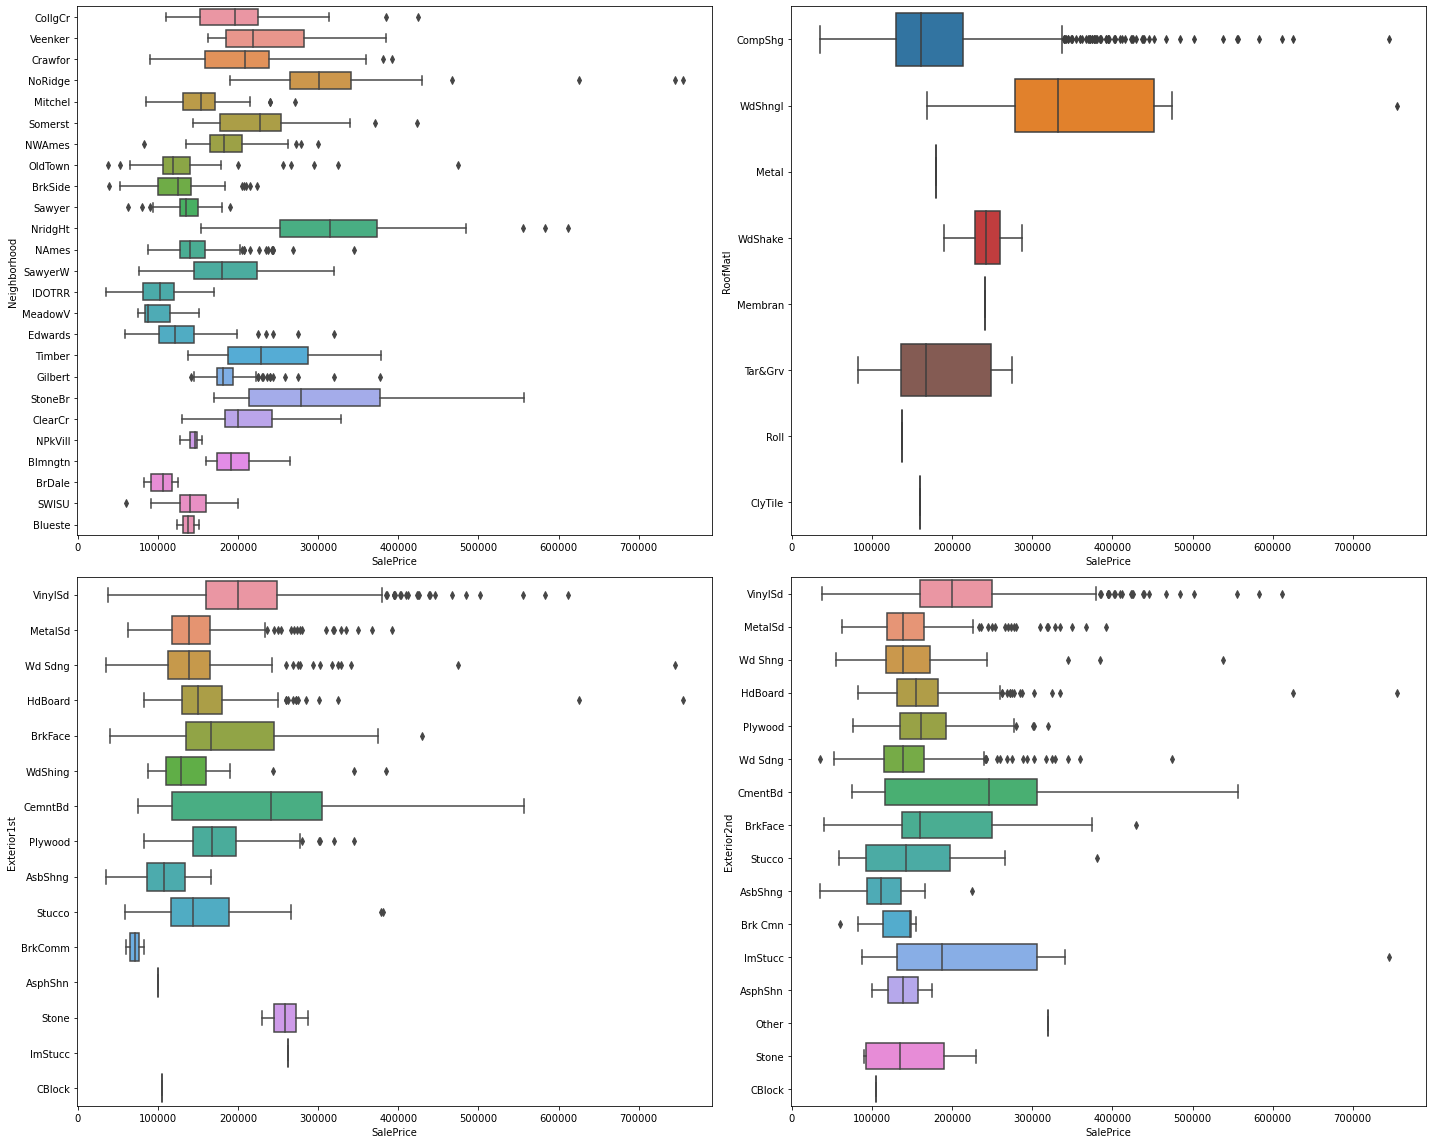

In [416]:
unordered_list=['Neighborhood', 'RoofMatl', 'Exterior1st', 'Exterior2nd']
def hboxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(2, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(housing['SalePrice'], housing[feature])
        plt.tight_layout()
hboxplot(unordered_list)

**Comments**
- Neighbourhood StoneBr and BridgHt has higher sales price
- Exterior1st CemntBd has higher sale value

#### Dummy Variables for unordered variables

In [417]:
unordered_features = ['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'SaleType','SaleCondition']

In [418]:
dummy_df = pd.get_dummies(housing[unordered_features], drop_first=True)

In [419]:
dummy_df.shape

(1451, 133)

In [420]:
housing.shape

(1451, 60)

Removing redundant variables

In [421]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_

In [422]:
dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1451, 47)


In [423]:
housing.shape

(1451, 60)

In [424]:
# Adding the dummy variables to the original dataframe
housing = pd.concat([housing,dummy_df],axis=1)

In [425]:
housing.shape

(1451, 107)

In [426]:
# Dropping the redundant columns
housing = housing.drop(unordered_features,axis=1)

In [427]:
housing.shape

(1451, 88)

In [428]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 88 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MSSubClass                 1451 non-null   int64  
 1   LotFrontage                1451 non-null   float64
 2   LotArea                    1451 non-null   int64  
 3   LotShape                   1451 non-null   int64  
 4   LandSlope                  1451 non-null   int64  
 5   HouseStyle                 1451 non-null   int64  
 6   OverallQual                1451 non-null   int64  
 7   OverallCond                1451 non-null   int64  
 8   YearBuilt                  1451 non-null   int64  
 9   YearRemodAdd               1451 non-null   int64  
 10  MasVnrArea                 1451 non-null   float64
 11  ExterQual                  1451 non-null   int64  
 12  ExterCond                  1451 non-null   int64  
 13  BsmtQual                   1451 non-null   int64

### Step 3: Splitting into Train and Test Data

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


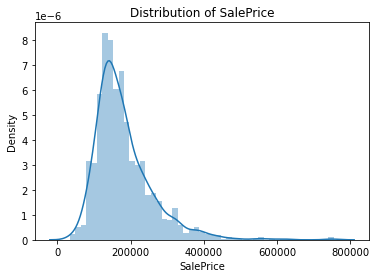

In [429]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(housing['SalePrice'])
plt.show()

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


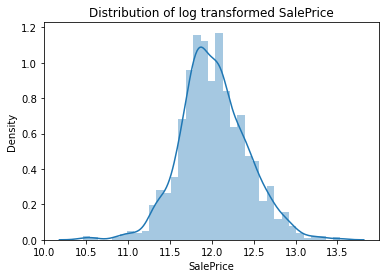

In [430]:
sns.distplot(np.log(housing['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [431]:

y = np.log(housing['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
31      11.914048
32      12.100156
33      12.016726
34      12.533576
35      12.641097
36      11.884489
37      11.938193
38      11.599103
39      11.314475
40      11.982929
41      12.043554
42      11.877569
43      11.777211
44      11.856515
45      12.675764
46      12.387085
47      12.428015
48      11.635143
49      11.751942
50      12.083905
51      11.648330
52      11.608236
53      12.860999
54      11.775290
55      12

In [432]:
X = housing.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,3,7,5,7,7,...,1,1,0,0,0,1,0,1,1,0
1,20,80.0,9600,3,0,0,6,8,34,34,...,1,1,0,0,0,1,0,1,1,0
2,60,68.0,11250,0,0,3,7,5,9,8,...,1,1,0,0,0,1,0,1,1,0
3,70,60.0,9550,0,0,3,7,5,95,40,...,1,0,0,1,0,1,0,1,0,0
4,60,84.0,14260,0,0,3,8,5,10,10,...,1,1,0,0,0,1,0,1,1,0


In [433]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [434]:
#Scaling X_train using MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)

In [435]:
X_train_scaled.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,0.176471,0.204969,0.023567,1.0,0.0,0.285714,0.444444,0.875,0.978261,0.233333,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.823529,0.018634,0.005712,1.0,0.0,0.428571,0.666667,0.500,0.043478,0.100000,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.000000,0.304348,0.030994,1.0,0.0,0.000000,0.444444,0.500,0.369565,0.850000,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.000000,0.298137,0.031901,0.0,0.0,0.000000,0.333333,0.375,0.282609,0.650000,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
4,0.000000,0.304348,0.030994,1.0,0.0,0.000000,0.444444,0.625,0.362319,0.833333,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [436]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1160, 87)
(291, 87)
(1160,)
(291,)


### Step 4: Model building

#### Initial Feature Selection with RFE

In [437]:
#top 35 variables
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

rfe = RFE(lm, 35)             # running RFE
rfe = rfe.fit(X_train_scaled, y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=35 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [438]:
list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 18),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('LotShape', False, 42),
 ('LandSlope', True, 1),
 ('HouseStyle', False, 38),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 39),
 ('MasVnrArea', False, 49),
 ('ExterQual', False, 16),
 ('ExterCond', False, 5),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 48),
 ('BsmtExposure', False, 17),
 ('BsmtFinType1', False, 51),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 24),
 ('BsmtUnfSF', True, 1),
 ('HeatingQC', True, 1),
 ('CentralAir', False, 11),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 40),
 ('FullBath', True, 1),
 ('HalfBath', False, 9),
 ('BedroomAbvGr', False, 36),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('Functional', True, 1),
 ('Fireplaces', True, 1),
 ('GarageFinish', False, 19),
 ('GarageArea', True, 1),
 ('GarageQual', True, 1),
 ('GarageC

In [439]:
col = X_train_scaled.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond',
       'YearBuilt', 'BsmtQual', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'MSZoning_RL',
       'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object')

In [440]:

def build_regressor(X_train_scaled,y_train,col):
    X_train_ols = sm.add_constant(X_train_scaled[col])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())   

In [441]:
build_regressor(X_train_scaled,y_train,col)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     299.6
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:12:39   Log-Likelihood:                 795.84
No. Observations:                1160   AIC:                            -1520.
Df Residuals:                    1124   BIC:                            -1338.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.52

C:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


About 92% of the variation is been explain in train model

In [442]:
#Residual analysis
y_train_pred = lm.predict(X_train_scaled)
y_train_pred

array([11.44300434, 11.76378474, 11.86303383, ..., 11.7792313 ,
       12.4007082 , 12.45624963])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

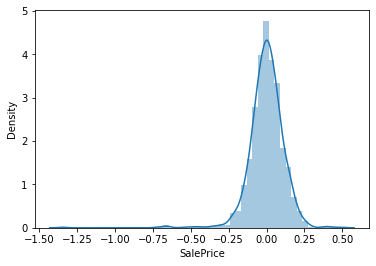

In [443]:
res = y_train - y_train_pred
sns.distplot(res)

### Step 5: Prediction and evaluation of Test set

In [444]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [445]:
X_test_scaled.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,...,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,0.217404,0.313569,0.046292,0.634593,0.030928,0.240059,0.578465,0.576890,0.268987,0.391867,...,0.924399,0.594502,0.075601,0.261168,0.054983,0.927835,0.082474,0.862543,0.841924,0.085911
std,0.253017,0.174493,0.051907,0.474364,0.134185,0.269657,0.163199,0.141744,0.221656,0.346218,...,0.264815,0.491834,0.264815,0.440028,0.228339,0.259207,0.275560,0.344922,0.365440,0.280715
min,0.000000,0.000000,0.000827,0.000000,0.000000,0.000000,0.000000,0.250000,0.007246,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.242236,0.031384,0.000000,0.000000,0.000000,0.444444,0.500000,0.050725,0.100000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,0.176471,0.298137,0.039534,1.000000,0.000000,0.285714,0.555556,0.500000,0.260870,0.233333,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,0.294118,0.360248,0.049805,1.000000,0.000000,0.428571,0.666667,0.625000,0.420290,0.666667,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.813665,0.763561,1.000000,1.000000,1.000000,1.000000,1.000000,0.927536,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [446]:
# Check the ranks
list(zip(X_test_scaled.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 18),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('LotShape', False, 42),
 ('LandSlope', True, 1),
 ('HouseStyle', False, 38),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 39),
 ('MasVnrArea', False, 49),
 ('ExterQual', False, 16),
 ('ExterCond', False, 5),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 48),
 ('BsmtExposure', False, 17),
 ('BsmtFinType1', False, 51),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 24),
 ('BsmtUnfSF', True, 1),
 ('HeatingQC', True, 1),
 ('CentralAir', False, 11),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 40),
 ('FullBath', True, 1),
 ('HalfBath', False, 9),
 ('BedroomAbvGr', False, 36),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('Functional', True, 1),
 ('Fireplaces', True, 1),
 ('GarageFinish', False, 19),
 ('GarageArea', True, 1),
 ('GarageQual', True, 1),
 ('GarageC

In [447]:
col1 = X_test_scaled.columns[rfe.support_]
col1

Index(['LotFrontage', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond',
       'YearBuilt', 'BsmtQual', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'MSZoning_RL',
       'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object')

In [448]:
X_test_rfe = X_test_scaled[col1]

In [449]:
X_test_rfe

,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,BsmtQual,BsmtFinSF1,BsmtUnfSF,HeatingQC,...,Neighborhood_NridgHt,Neighborhood_Somerst,Condition2_Norm,RoofStyle_Gable,RoofStyle_Hip,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,SaleCondition_Normal,SaleCondition_Partial
0,0.366460,0.042469,0.0,0.777778,0.500,0.043478,0.8,0.647788,0.248955,1.00,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.434783,0.060039,0.0,0.666667,0.750,0.188406,0.8,0.094248,0.462146,1.00,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.335404,0.048260,0.0,0.444444,0.375,0.326087,0.6,0.372124,0.091965,1.00,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.440994,0.019725,0.0,0.555556,0.625,0.710145,0.6,0.000000,0.350673,1.00,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.701863,0.076912,0.0,0.444444,0.375,0.369565,0.6,0.077876,0.599164,0.50,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.211180,0.033770,0.0,0.444444,0.625,0.717391,0.6,0.000000,0.436600,0.50,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.291925,0.035121,0.0,0.666667,0.500,0.036232,0.8,0.409292,0.162099,1.00,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7,0.304348,0.033186,0.0,0.777778,0.625,0.065217,0.8,0.284513,0.077566,1.00,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.298137,0.133955,0.0,0.666667,0.625,0.115942,0.8,0.263274,0.175569,1.00,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.242236,0.027577,0.0,0.333333,0.500,0.434783,0.0,0.000000,0.000000,0.50,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [450]:
from sklearn import metrics
y_test_pred = lm.predict(X_test_scaled)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.772898309364124

test set r2 value is low than train set r2. That means test set is only able to explain 77% of variance in data

In [451]:
# Model Evaluation
from sklearn.metrics import mean_squared_error
print(" Multilinear Regression")
print('R2 score (train) : ',r2_score(y_train,y_train_pred))
print('R2 score (test) : ',r2_score(y_test,y_test_pred))
print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

 Multilinear Regression
R2 score (train) :  0.9125500963629295
R2 score (test) :  0.772898309364124
RMSE (train) :  0.11580848692121475
RMSE (test) :  0.20374291038390482


We will check for Ridge or Lasso regression methods to make test r2 better

### Ridge Regression

In [452]:
X_train_rfe = X_train_scaled[col]

In [453]:
X_train_rfe

,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,BsmtQual,BsmtFinSF1,BsmtUnfSF,HeatingQC,...,Neighborhood_NridgHt,Neighborhood_Somerst,Condition2_Norm,RoofStyle_Gable,RoofStyle_Hip,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,SaleCondition_Normal,SaleCondition_Partial
0,0.204969,0.023567,0.0,0.444444,0.875,0.978261,0.6,0.000000,0.362285,0.75,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.018634,0.005712,0.0,0.666667,0.500,0.043478,0.8,0.000000,0.450534,1.00,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.304348,0.030994,0.0,0.444444,0.500,0.369565,0.6,0.507965,0.000000,0.50,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.298137,0.031901,0.0,0.333333,0.375,0.282609,0.6,0.271681,0.113330,0.50,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.304348,0.030994,0.0,0.444444,0.625,0.362319,0.6,0.165487,0.168602,0.50,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.298137,0.023090,0.0,0.444444,0.375,0.536232,0.8,0.000000,0.416163,0.75,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.236025,0.043436,0.0,0.666667,0.500,0.101449,0.8,0.406637,0.372039,1.00,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
7,0.242236,0.038795,0.0,0.333333,0.750,0.434783,0.8,0.195575,0.290293,0.50,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.298137,0.091056,0.0,0.666667,0.750,0.304348,0.6,0.131416,0.558755,0.50,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,0.335404,0.061974,0.0,0.444444,0.750,0.427536,0.6,0.287611,0.082675,1.00,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [454]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_scaled, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [455]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=40]

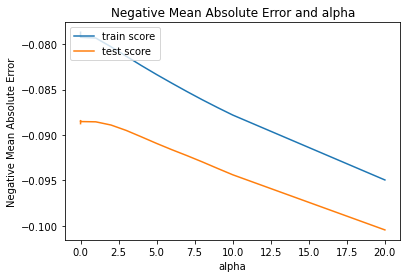

In [456]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [457]:
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_scaled, y_train)
ridge.coef_

array([-0.02651012,  0.07247334,  0.03141907, -0.0189645 ,  0.01931182,
        0.01842633,  0.16645453,  0.07200468, -0.02632592, -0.0759448 ,
        0.03831452,  0.08896305,  0.0123812 ,  0.07329208,  0.02668158,
        0.05754091,  0.04490571,  0.10015847,  0.01537513,  0.06514908,
        0.05369118,  0.05102525,  0.14319182,  0.13371908,  0.16028749,
        0.05736487, -0.00127436,  0.12149219,  0.07367632,  0.06169296,
        0.00537333,  0.10628849, -0.04157064,  0.14197508,  0.06836634,
        0.12131205,  0.03429801,  0.02803692,  0.04248738,  0.04306665,
        0.0641584 , -0.04348478, -0.0258396 ,  0.0374214 , -0.0160526 ,
       -0.03198079, -0.06231865, -0.04138539, -0.03340704,  0.00537544,
        0.05870696, -0.00580848, -0.03205715,  0.03872164, -0.00044457,
        0.0242827 ,  0.02239924, -0.03464554, -0.04103301,  0.019206  ,
       -0.02287065, -0.0311285 , -0.00538009,  0.00087695, -0.00463605,
       -0.02327752, -0.00530986, -0.00216199,  0.00226048,  0.00

In [458]:
# ridge model parameters
ridge_model_parameters = list(ridge.coef_)
ridge_model_parameters.insert(0, ridge.intercept_)
ridge_model_parameters = [round(x, 3) for x in model_parameters]
ridge_cols = X.columns
ridge_cols = cols.insert(0, "constant")
list(zip(ridge_cols, ridge_model_parameters))

[('constant', 11.318),
 ('constant', -0.0),
 ('MSSubClass', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', -0.016),
 ('LotShape', 0.0),
 ('LandSlope', 0.0),
 ('HouseStyle', 0.559),
 ('OverallQual', 0.0),
 ('OverallCond', -0.0),
 ('YearBuilt', -0.12),
 ('YearRemodAdd', 0.0),
 ('MasVnrArea', 0.0),
 ('ExterQual', 0.0),
 ('ExterCond', 0.0),
 ('BsmtQual', 0.0),
 ('BsmtCond', 0.008),
 ('BsmtExposure', 0.051),
 ('BsmtFinType1', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('HeatingQC', 0.0),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.453),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', 0.117),
 ('KitchenQual', -0.0),
 ('Functional', 0.148),
 ('Fireplaces', 0.098),
 ('GarageFinish', 0.201),
 ('GarageArea', 0.0),
 ('GarageQual', 0.0),
 ('GarageCond', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.06),
 ('MSZoning_RL', -0.032),
 ('MSZoning_RM', -0.0),
 (

In [459]:
# ridge regression
lm = Ridge(alpha=50)
lm.fit(X_train_scaled, y_train)

# predict
y_train_pred_ridge = lm.predict(X_train_scaled)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = lm.predict(X_test_scaled)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.8559518435602667
0.8029143678355514


Here we get min difference between test and train when alpha is 50 for Ridge regression

In [460]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.20374291038390482


### Lasso Regression

In [461]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_scaled, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [462]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.044510,0.015808,0.001215,0.001161,0.0001,{'alpha': 0.0001},-0.081007,-0.088088,-0.086168,-0.092893,...,-0.087436,0.003890,1,-0.080206,-0.076207,-0.079411,-0.077416,-0.080381,-0.078724,0.001641
1,0.011779,0.004774,0.001200,0.002400,0.001,{'alpha': 0.001},-0.078966,-0.090184,-0.087970,-0.098746,...,-0.088778,0.006306,2,-0.084302,-0.081146,-0.083205,-0.081953,-0.083532,-0.082828,0.001132
2,0.006248,0.007653,0.003122,0.006243,0.01,{'alpha': 0.01},-0.113560,-0.128163,-0.129331,-0.141223,...,-0.126835,0.009117,3,-0.128003,-0.123429,-0.123943,-0.123265,-0.123950,-0.124518,0.001764
3,0.003124,0.006248,0.003124,0.006249,0.05,{'alpha': 0.05},-0.240273,-0.262608,-0.251986,-0.250355,...,-0.247123,0.010960,4,-0.244592,-0.245561,-0.248374,-0.245639,-0.247094,-0.246252,0.001328
4,0.003124,0.006248,0.003124,0.006248,0.1,{'alpha': 0.1},-0.298317,-0.323324,-0.308082,-0.300057,...,-0.303847,0.011395,5,-0.303058,-0.303006,-0.303328,-0.302018,-0.306713,-0.303625,0.001607


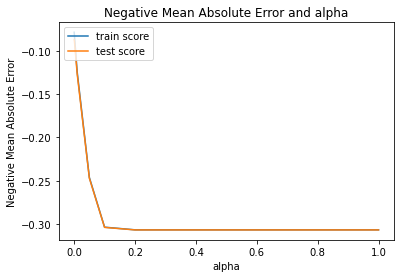

In [463]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [464]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_scaled, y_train)
lasso.coef_

array([-0.        ,  0.        ,  0.        , -0.01642996,  0.        ,
        0.        ,  0.55890708,  0.        , -0.        , -0.12038969,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00808062,  0.05065687,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.45308396,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.11704241, -0.        ,  0.14767244,  0.09845877,
        0.20115751,  0.        ,  0.        ,  0.        ,  0.        ,
        0.06027708, -0.03208302, -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.01541068,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

In [465]:
# lasso model parameters
lasso_model_parameters = list(lasso.coef_ )
lasso_model_parameters.insert(0, lasso.intercept_)
lasso_model_parameters = [round(x, 3) for x in model_parameters]
lasso_cols = X.columns
lasso_cols = cols.insert(0, "constant")
list(zip(lasso_cols, lasso_model_parameters))

[('constant', 11.318),
 ('constant', -0.0),
 ('MSSubClass', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', -0.016),
 ('LotShape', 0.0),
 ('LandSlope', 0.0),
 ('HouseStyle', 0.559),
 ('OverallQual', 0.0),
 ('OverallCond', -0.0),
 ('YearBuilt', -0.12),
 ('YearRemodAdd', 0.0),
 ('MasVnrArea', 0.0),
 ('ExterQual', 0.0),
 ('ExterCond', 0.0),
 ('BsmtQual', 0.0),
 ('BsmtCond', 0.008),
 ('BsmtExposure', 0.051),
 ('BsmtFinType1', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('HeatingQC', 0.0),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.453),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', 0.117),
 ('KitchenQual', -0.0),
 ('Functional', 0.148),
 ('Fireplaces', 0.098),
 ('GarageFinish', 0.201),
 ('GarageArea', 0.0),
 ('GarageQual', 0.0),
 ('GarageCond', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.06),
 ('MSZoning_RL', -0.032),
 ('MSZoning_RM', -0.0),
 (

In [466]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train_scaled, y_train)

# prediction on the test set(Using R2)
y_train_pred_lasso = lm.predict(X_train_scaled)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lm.predict(X_test_scaled)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.8009752385420306
0.7766057143022089


In Lasson you can see difference of 3% between test and train r2 which is now close by when alpha is 0.01

### Comparing Model Coefficients

In [467]:
model_coefficients = pd.DataFrame(index=X_train_scaled.columns)
model_coefficients.rows = X_train_scaled.columns
model_coefficients['Ridge (alpha=50)'] = ridge.coef_
model_coefficients['Lasso (alpha=0.01)'] = lasso.coef_
pd.set_option('display.max_rows', None)
model_coefficients

C:\Users\91908\AppData\Local\Temp/ipykernel_22020/2672133668.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  model_coefficients.rows = X_train_scaled.columns


,Ridge (alpha=50),Lasso (alpha=0.01)
MSSubClass,-0.026510,-0.000000
LotFrontage,0.072473,0.000000
LotArea,0.031419,0.000000
LotShape,-0.018965,-0.016430
LandSlope,0.019312,0.000000
HouseStyle,0.018426,0.000000
OverallQual,0.166455,0.558907
OverallCond,0.072005,0.000000
YearBuilt,-0.026326,-0.000000
YearRemodAdd,-0.075945,-0.120390


The coefficients of lasso have reduced towards zero and many coefficiants have become zero

In [468]:
print(" Ridge Regression")
print('R2 score (train) : ',r2_score(y_train,y_train_pred_ridge))
print('R2 score (test) : ',r2_score(y_test,y_test_pred_ridge))
print(" Lasso Regression")
print('R2 score (train) : ',r2_score(y_train,y_train_pred_lasso))
print('R2 score (test) : ',r2_score(y_test,y_test_pred_lasso))

 Ridge Regression
R2 score (train) :  0.8559518435602667
R2 score (test) :  0.8029143678355514
 Lasso Regression
R2 score (train) :  0.8009752385420306
R2 score (test) :  0.7766057143022089


### Final Model

Will select Ridge because it has higher r2 value than lasso for both train and test data 

In [469]:
# 50 features ordered by feature importance in Ridge Regression

model_coefficients[['Ridge (alpha=50)']].sort_values(by='Ridge (alpha=50)', ascending=False)

,Ridge (alpha=50)
OverallQual,0.166455
GrLivArea,0.160287
1stFlrSF,0.143192
Fireplaces,0.141975
2ndFlrSF,0.133719
FullBath,0.121492
GarageArea,0.121312
KitchenQual,0.106288
BsmtFinSF1,0.100158
ExterQual,0.088963


In [470]:
model_coefficients[['Ridge (alpha=50)']].sort_values(by='Ridge (alpha=50)', ascending=False).index[:10]

Index(['OverallQual', 'GrLivArea', '1stFlrSF', 'Fireplaces', '2ndFlrSF',
       'FullBath', 'GarageArea', 'KitchenQual', 'BsmtFinSF1', 'ExterQual'],
      dtype='object')

- Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method.

- Optimum alpha = 50 for ridge and 0.01 for lasso model.

- Model evaluation is done with R2 score and Root Mean Square Error.

- Ridge Regression is chosen as final model for having slightly better R-square value 

- Out of 40 features in the final model, top 10 features in order of descending importance are 'OverallQual', 'GrLivArea', '1stFlrSF', 'Fireplaces', '2ndFlrSF','FullBath', 'GarageArea', 'KitchenQual', 'BsmtFinSF1', 'ExterQual'


### Subjective Questions

What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [471]:
# double alpha value for Ridge 
# ridge regression
lm = Ridge(alpha=100)
lm.fit(X_train_scaled, y_train)

# predict
y_train_pred_ridge = lm.predict(X_train_scaled)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = lm.predict(X_test_scaled)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.8180384972219272
0.7722634192361295


In [478]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_scaled, y_train)
ridge.coef_

array([-0.01982528,  0.05351729,  0.0210569 , -0.0268295 ,  0.01525977,
        0.02131782,  0.12040878,  0.04245332, -0.02741557, -0.07552483,
        0.03112706,  0.07741943,  0.01023537,  0.06357244,  0.02544087,
        0.05063129,  0.0470148 ,  0.07343844,  0.0116412 ,  0.04624598,
        0.04834605,  0.04382334,  0.09893854,  0.10267017,  0.11556644,
        0.04595424, -0.00091615,  0.09586275,  0.06536119,  0.04391862,
        0.00149955,  0.09397932, -0.02381367,  0.11519871,  0.0704194 ,
        0.09600293,  0.03248561,  0.02901548,  0.03475281,  0.03619535,
        0.05775466, -0.04816057, -0.02430321,  0.02836761, -0.01787393,
       -0.02462549, -0.05097141, -0.02848457, -0.030902  ,  0.01029525,
        0.05132047, -0.00516641, -0.02634309,  0.03013684, -0.00591089,
        0.01676221,  0.01212734, -0.03068491, -0.04009973,  0.0264536 ,
       -0.01598674, -0.02638629, -0.00651867,  0.00547877,  0.00110921,
       -0.01685935, -0.00890665, -0.00451583,  0.00207834,  0.00

In [479]:
# ridge model parameters
ridge_model_parameters = list(ridge.coef_)
ridge_model_parameters.insert(0, ridge.intercept_)
ridge_model_parameters = [round(x, 3) for x in model_parameters]
ridge_cols = X.columns
ridge_cols = cols.insert(0, "constant")
list(zip(ridge_cols, ridge_model_parameters))

[('constant', 11.318),
 ('constant', -0.0),
 ('MSSubClass', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', -0.016),
 ('LotShape', 0.0),
 ('LandSlope', 0.0),
 ('HouseStyle', 0.559),
 ('OverallQual', 0.0),
 ('OverallCond', -0.0),
 ('YearBuilt', -0.12),
 ('YearRemodAdd', 0.0),
 ('MasVnrArea', 0.0),
 ('ExterQual', 0.0),
 ('ExterCond', 0.0),
 ('BsmtQual', 0.0),
 ('BsmtCond', 0.008),
 ('BsmtExposure', 0.051),
 ('BsmtFinType1', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('HeatingQC', 0.0),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.453),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', 0.117),
 ('KitchenQual', -0.0),
 ('Functional', 0.148),
 ('Fireplaces', 0.098),
 ('GarageFinish', 0.201),
 ('GarageArea', 0.0),
 ('GarageQual', 0.0),
 ('GarageCond', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.06),
 ('MSZoning_RL', -0.032),
 ('MSZoning_RM', -0.0),
 (

In [480]:
model_coefficients = pd.DataFrame(index=X_train_scaled.columns)
model_coefficients.rows = X_train_scaled.columns
model_coefficients['Ridge (alpha=100)'] = ridge.coef_
pd.set_option('display.max_rows', None)
model_coefficients

C:\Users\91908\AppData\Local\Temp/ipykernel_22020/4097359192.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  model_coefficients.rows = X_train_scaled.columns


,Ridge (alpha=100)
MSSubClass,-0.019825
LotFrontage,0.053517
LotArea,0.021057
LotShape,-0.026830
LandSlope,0.015260
HouseStyle,0.021318
OverallQual,0.120409
OverallCond,0.042453
YearBuilt,-0.027416
YearRemodAdd,-0.075525


In [481]:

model_coefficients[['Ridge (alpha=100)']].sort_values(by='Ridge (alpha=100)', ascending=False)

,Ridge (alpha=100)
OverallQual,0.120409
GrLivArea,0.115566
Fireplaces,0.115199
2ndFlrSF,0.102670
1stFlrSF,0.098939
GarageArea,0.096003
FullBath,0.095863
KitchenQual,0.093979
ExterQual,0.077419
BsmtFinSF1,0.073438


In [483]:
# double alpha value for Lasso
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_scaled, y_train)
lasso.coef_

array([-4.02976742e-02,  4.74098257e-02,  0.00000000e+00, -6.99574166e-03,
        3.42474178e-02, -0.00000000e+00,  5.38368836e-01,  2.58390838e-01,
       -8.24966002e-02, -2.99074770e-02,  0.00000000e+00,  3.54554587e-02,
        0.00000000e+00,  1.11789185e-01,  0.00000000e+00,  5.20469063e-02,
        1.00925569e-02,  1.21629214e-01,  0.00000000e+00,  0.00000000e+00,
        5.07323729e-02,  3.78579803e-02,  1.99863763e-01,  0.00000000e+00,
        9.61553436e-01,  6.35360167e-02,  0.00000000e+00,  4.93439596e-02,
        3.21722170e-02,  0.00000000e+00, -0.00000000e+00,  6.04253307e-02,
       -1.38129064e-01,  1.31256289e-01,  4.21968630e-02,  1.96429169e-01,
        0.00000000e+00,  0.00000000e+00,  1.13558358e-02,  0.00000000e+00,
        8.73987792e-02, -8.44750684e-04, -0.00000000e+00,  3.75972731e-02,
       -7.93650252e-03, -0.00000000e+00, -4.11633686e-02, -0.00000000e+00,
       -8.34866323e-03, -0.00000000e+00,  6.18732981e-02, -3.96335598e-03,
       -0.00000000e+00,  

In [484]:
# lasso model parameters
lasso_model_parameters = list(lasso.coef_ )
lasso_model_parameters.insert(0, lasso.intercept_)
lasso_model_parameters = [round(x, 3) for x in model_parameters]
lasso_cols = X.columns
lasso_cols = cols.insert(0, "constant")
list(zip(lasso_cols, lasso_model_parameters))

[('constant', 11.318),
 ('constant', -0.0),
 ('MSSubClass', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', -0.016),
 ('LotShape', 0.0),
 ('LandSlope', 0.0),
 ('HouseStyle', 0.559),
 ('OverallQual', 0.0),
 ('OverallCond', -0.0),
 ('YearBuilt', -0.12),
 ('YearRemodAdd', 0.0),
 ('MasVnrArea', 0.0),
 ('ExterQual', 0.0),
 ('ExterCond', 0.0),
 ('BsmtQual', 0.0),
 ('BsmtCond', 0.008),
 ('BsmtExposure', 0.051),
 ('BsmtFinType1', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('HeatingQC', 0.0),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.453),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', 0.117),
 ('KitchenQual', -0.0),
 ('Functional', 0.148),
 ('Fireplaces', 0.098),
 ('GarageFinish', 0.201),
 ('GarageArea', 0.0),
 ('GarageQual', 0.0),
 ('GarageCond', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.06),
 ('MSZoning_RL', -0.032),
 ('MSZoning_RM', -0.0),
 (

In [485]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train_scaled, y_train)

# prediction on the test set(Using R2)
y_train_pred_lasso = lm.predict(X_train_scaled)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lm.predict(X_test_scaled)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9030736747490725
0.809262217432381
